In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import seaborn as sns
sns.set(context='paper', style='whitegrid', font_scale=1.75)
from visualize import *
#import plot_help as db
import cv2


In [2]:
#import matlab.engine
#eng = matlab.engine.start_matlab()


In [3]:
dirname = '../figures/'
#os.makedirs(dirname, exist_ok=True)
save_figs = True
def save(n, ext='.png', save_figs=True, **kwargs):
    if save_figs==True:
        kwargs.setdefault('bbox_inches', 'tight')
        kwargs.setdefault('pad_inches', 0)
        kwargs.setdefault('transparent', True)
        plt.savefig(os.path.join(dirname, n + ext), **kwargs)


In [4]:
def get_all_particles(path_dict,iteration):
    res_dict = {}
    for key, value in path_dict.items():
        pickle_in = open(os.path.join(value,"data/iter_"+str(iteration)+".pickle"),"rb")
        data = pickle.load(pickle_in)
        res_dict[key] = data
    return res_dict

In [5]:
def set_axis_prop(ax, titles,sub_titles,scale_x='log',scale_y='log',xlabel='Iterations'):
    if len(ax.shape)==1:
        ax =np.array([ax])
    for i in range(len(ax)):
        for j in range(len(ax[0,:])):
            ax[i,j].set_title(sub_titles[j] +', ' + titles[i])
            ax[i,j].set_xscale(scale_x)
            ax[i,j].set_yscale(scale_y)
            ax[i,j].set_ylabel('$Error$')
            ax[i,j].set_xlabel(xlabel)

In [ ]:
exp_path = 'D:/Data/OptSync/'
exp_name  = 'synthetic'
res_path_prod_particles_no_weights = {
    'MMD: Euclidean':exp_path+'2114'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2110'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2115'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2105'+exp_name,
}
res_path_prod_particles_with_weights = {
    'MMD: Euclidean':exp_path+'2119'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2109'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2117'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2107'+exp_name,
}

res_path_no_weights = {
    'MMD: Euclidean':exp_path+'2116'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2108'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2111'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2104'+exp_name,
}
res_path_with_weights = {
    'MMD: Euclidean':exp_path+'2118'+exp_name,
    'MMD= PowerQuaternion':exp_path+'2112'+exp_name,
    'Sinkhorn: Euclidean':exp_path+'2113'+exp_name,
    'Sinkhorn: PowerQuaternion':exp_path+'2106'+exp_name,
}
res_path = res_path_prod_particles_no_weights

#res_path = res_path_prod_particles_with_weights


colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = False
res_dicts = get_res(res_path,refresh=refresh)

In [20]:
exp_path = 'D:/Data/OptSync'
exp_name  = 'FountainP11'
res_path = {'mmd: Geodesic':  exp_path + '/synthetic/synthetic_prod_true_N_2_noise_-1.0_B_noise_-1.0_unfaithfulness_false/mmd_power_quaternion__with_weights_RM_product/0'}
#res_path = {'mmd: Geodesic':  exp_path + '/synthetic/synthetic_prod_true_N_2_noise_-1.0_B_noise_-1.0_unfaithfulness_false/sinkhorn_power_quaternion__with_weights_RM_product/0'}
#res_path = {'Sinkhorn: Geodesic':  exp_path + '/FountainP11/real_data_prod_true_N_1_noise_-1.0_B_noise_-1.0_unfaithfulness_false/sinkhorn_power_quaternion__with_weights_RM_product/0'}
print(res_path)

colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = False
res_dicts = get_res(res_path,refresh=refresh)


{'mmd: Geodesic': 'D:/Data/OptSync/synthetic/synthetic_prod_true_N_2_noise_-1.0_B_noise_-1.0_unfaithfulness_false/mmd_power_quaternion__with_weights_RM_product/0'}


In [6]:
print( res_path.items())

dict_items([('Sinkhorn: Geodesic', 'D:/Data/OptSync/FountainP11/real_data_prod_true_N_1_noise_-1.0_B_noise_-1.0_unfaithfulness_false/sinkhorn_power_quaternion__with_weights_RM_product/0')])


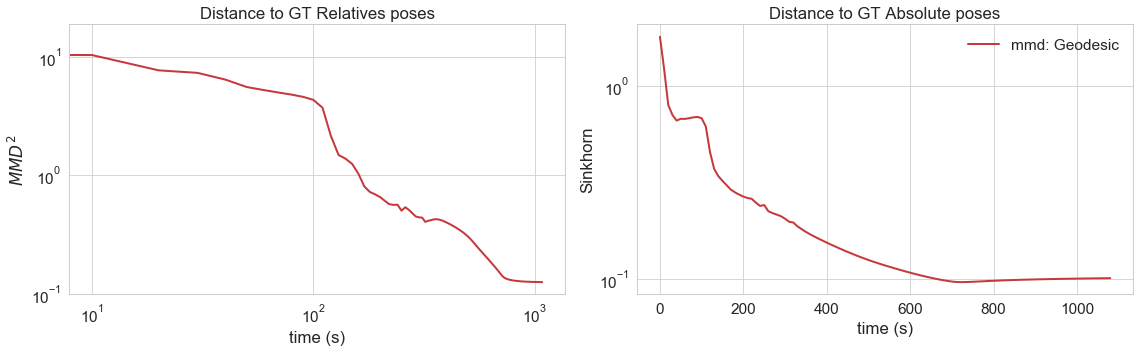

In [21]:
num_fig = 2
fig, ax = plt.subplots(1,num_fig, figsize=(8*num_fig,5))

value = 'loss'
xaxis = 'iteration'
refresh=  True
plot_from_dict(ax[0],res_dicts, xaxis, value, color_dict)
ax[0].set_title('Distance to GT Relatives poses')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$MMD^2$')
ax[0].set_xlabel('time (s)')
#ax[0].legend()

value = 'eval_dist'
xaxis = 'iteration'
plot_from_dict(ax[1],res_dicts, xaxis,  value, color_dict)
ax[1].set_title('Distance to GT Absolute poses')
ax[1].set_xscale('linear')
ax[1].set_yscale('log')
ax[1].set_ylabel('Sinkhorn')
ax[1].set_xlabel('time (s)')
ax[1].legend(bbox_to_anchor=(1., 1.),frameon=False)
fig.tight_layout()
filename = 'loss_sinkhorn_vs_mmd'
save(filename)


In [30]:
exp_path = '/nfs/data/michaela/projects/OptSync/synthetic/synthetic_prod_false_N_4_noise_0.25_B_noise_-1.0_unfaithfulness_false/'
exp_mmd_quat  = 'Np_10_opt_SGD_pow_2_loss_mmd_kernel_power_quaternion_with_weights_RM_product/'
exp_mmd_eucl  = 'Np_10_opt_SGD_pow_2_loss_mmd_kernel_squared_euclidean_with_weights_RM_product/'
exp_sink_quat  = 'Np_10_opt_SGD_pow_2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/'
exp_sink_eucl  = 'Np_10_opt_SGD_pow_2_loss_sinkhorn_kernel_squared_euclidean_with_weights_RM_product/'
exp_mmd_quat_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_mmd_kernel_power_quaternion_with_weights_RM_product/'
exp_mmd_eucl_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_mmd_kernel_squared_euclidean_with_weights_RM_product/'
exp_sink_quat_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/'
exp_sink_eucl_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_sinkhorn_kernel_squared_euclidean_with_weights_RM_product/'
exp_path_2 = '/nfs/data/michaela/projects/OptSync/new_synthetic/synthetic_prod_false_N_4_noise_0.25_B_noise_-1.0_unfaithfulness_false/'


res_path_2 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'85',
    'MMD: Q-C':exp_path+exp_mmd_quat+'87',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'92',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'88',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'86',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'84',
    'Sinkhorn: E-UC':exp_path+exp_sink_eucl_unconstraned+'91',
    'Sinkhorn: Q-UC':exp_path+exp_sink_quat_unconstraned+'95',
}
res_path_5 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'89',
    'MMD: Q-C':exp_path+exp_mmd_quat+'93',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'98',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'102',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'90',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'94',
    'Sinkhorn: E-UC':exp_path+exp_sink_eucl_unconstraned+'103',
    'Sinkhorn: Q-UC':exp_path+exp_sink_quat_unconstraned+'107',
}

res_path_7 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'96',
    'MMD: Q-C':exp_path_2+exp_mmd_quat+'113',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'101',
    'Sinkhorn: Q-C':exp_path_2+exp_sink_quat+'111',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'100',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'106',
    'Sinkhorn: E-UC':exp_path+exp_sink_eucl_unconstraned+'104',
    'Sinkhorn: Q-UC':exp_path+exp_sink_quat_unconstraned+'97',
}


res_path = res_path_7

#res_path = res_path_prod_particles_with_weights


colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = True
res_dicts = get_res(res_path,refresh=refresh)

In [5]:
exp_path = '/nfs/data/michaela/projects/OptSync/synthetic/synthetic_prod_true_N_4_noise_0_B_noise_-1.0_unfaithfulness_false/'
exp_mmd_quat  = 'Np_10_opt_SGD_pow_1.5_loss_mmd_kernel_power_quaternion_with_weights_RM_product/'
exp_mmd_eucl  = 'Np_10_opt_SGD_pow_1.5_loss_mmd_kernel_squared_euclidean_with_weights_RM_product/'
exp_sink_quat  = 'Np_10_opt_SGD_pow_1.5_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/'
exp_sink_eucl  = 'Np_10_opt_SGD_pow_1.5_loss_sinkhorn_kernel_squared_euclidean_with_weights_RM_product/'
exp_mmd_quat_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_1.5_loss_mmd_kernel_power_quaternion_with_weights_RM_product/'
exp_mmd_eucl_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_1.5_loss_mmd_kernel_squared_euclidean_with_weights_RM_product/'
exp_sink_quat_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_1.5_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/'
exp_sink_eucl_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_1.5_loss_sinkhorn_kernel_squared_euclidean_with_weights_RM_product/'
#exp_path_2 = '/nfs/data/michaela/projects/OptSync/new_synthetic/synthetic_prod_false_N_4_noise_0.25_B_noise_-1.0_unfaithfulness_false/'


res_path_2 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'780',
    'MMD: Q-C':exp_path+exp_mmd_quat+'849',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'912',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'1518',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'900',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'970',
}
res_path_5 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'1233',
    'MMD: Q-C':exp_path+exp_mmd_quat+'1334',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'1474',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'1166',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'1413',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'789',
}

res_path_7 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'1139',
    'MMD: Q-C':exp_path+exp_mmd_quat+'1222',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'1046',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'1057',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'1294',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'1390',
}


res_path = res_path_7

#res_path = res_path_prod_particles_with_weights


colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = True
res_dicts = get_res(res_path,refresh=refresh)

In [ ]:
exp_path = '/nfs/data/michaela/projects/OptSync/synthetic/synthetic_prod_true_N_4_noise_0_B_noise_-1.0_unfaithfulness_false/'
exp_mmd_quat  = 'Np_10_opt_SGD_pow_2_loss_mmd_kernel_power_quaternion_with_weights_RM_product/'
exp_mmd_eucl  = 'Np_10_opt_SGD_pow_2_loss_mmd_kernel_squared_euclidean_with_weights_RM_product/'
exp_sink_quat  = 'Np_10_opt_SGD_pow_2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/'
exp_sink_eucl  = 'Np_10_opt_SGD_pow_2_loss_sinkhorn_kernel_squared_euclidean_with_weights_RM_product/'
exp_mmd_quat_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_mmd_kernel_power_quaternion_with_weights_RM_product/'
exp_mmd_eucl_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_mmd_kernel_squared_euclidean_with_weights_RM_product/'
exp_sink_quat_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/'
exp_sink_eucl_unconstraned  = 'Np_10_opt_SGD_unconstrained_pow_2_loss_sinkhorn_kernel_squared_euclidean_with_weights_RM_product/'
#exp_path_2 = '/nfs/data/michaela/projects/OptSync/new_synthetic/synthetic_prod_false_N_4_noise_0.25_B_noise_-1.0_unfaithfulness_false/'


res_path_2 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'780',
    'MMD: Q-C':exp_path+exp_mmd_quat+'849',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'912',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'1518',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'900',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'970',
}
res_path_5 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'1233',
    'MMD: Q-C':exp_path+exp_mmd_quat+'1334',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'1474',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'1166',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'1413',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'789',
}

res_path_7 = {
    'MMD: E-C':exp_path+exp_mmd_eucl+'1139',
    'MMD: Q-C':exp_path+exp_mmd_quat+'1222',
    'Sinkhorn: E-C':exp_path+exp_sink_eucl+'1046',
    'Sinkhorn: Q-C':exp_path+exp_sink_quat+'1057',
    'MMD: E-UC':exp_path+exp_mmd_eucl_unconstraned+'1294',
    'MMD: Q-UC':exp_path+exp_mmd_quat_unconstraned+'1390',
}


res_path = res_path_7

#res_path = res_path_prod_particles_with_weights


colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = True
res_dicts = get_res(res_path,refresh=refresh)

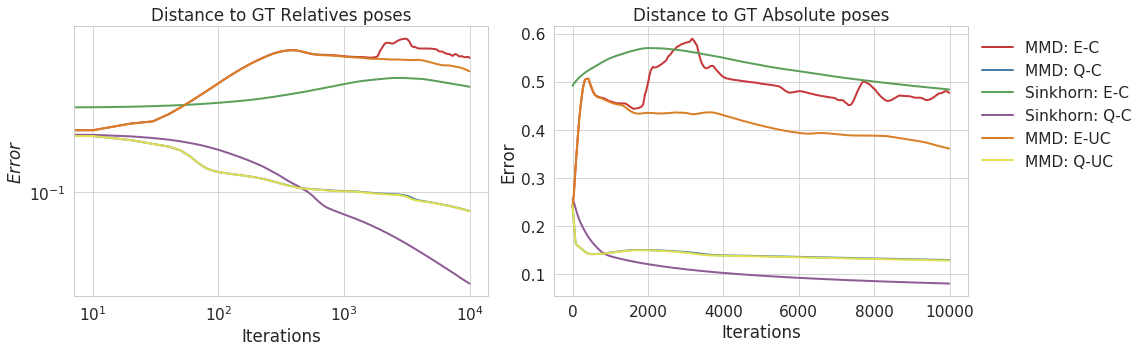

In [8]:
num_fig = 2
fig, ax = plt.subplots(3,num_fig, figsize=(8*num_fig,5))

value = 'eval_RM_dist'
xaxis = 'iteration'
refresh=  True
plot_from_dict(ax[0,0],res_dicts, xaxis, value, color_dict)
ax[0,0].set_title('Distance to GT Relatives poses')
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel('$Error$')
ax[0,0].set_xlabel('Iterations')
#ax[0].legend()

value = 'eval_dist'
xaxis = 'iteration'
plot_from_dict(ax[1],res_dicts, xaxis,  value, color_dict)
ax[0,1].set_title('Distance to GT Absolute poses')
ax[0,1].set_xscale('linear')
ax[0,1].set_yscale('linear')
ax[0,1].set_ylabel('Error')
ax[0,1].set_xlabel('Iterations')
#ax[1].set_xlim('Iterations')
ax[0,1].legend(bbox_to_anchor=(1., 1.),frameon=False)
fig.tight_layout()
filename = 'synth_2'
save(filename)

In [19]:
exp_path = '/nfs/data/michaela/projects/OptSync/synth_2/synth_2/'
subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0','comp':'0.2'}


res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)

subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.0001','comp':'0.2'}

res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)

subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.0005','comp':'0.2'}
res_dicts_3, color_dict_3 = get_selected_res(exp_path,subset_dictionary)


subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.001','comp':'0.2'}
res_dicts_4, color_dict_4 = get_selected_res(exp_path,subset_dictionary)


all_res_dict = [res_dicts_1,res_dicts_2,res_dicts_3,res_dicts_4]
all_colors_dict = [color_dict_1,color_dict_2,color_dict_3,color_dict_4]

In [20]:
len(all_res_dict)

4

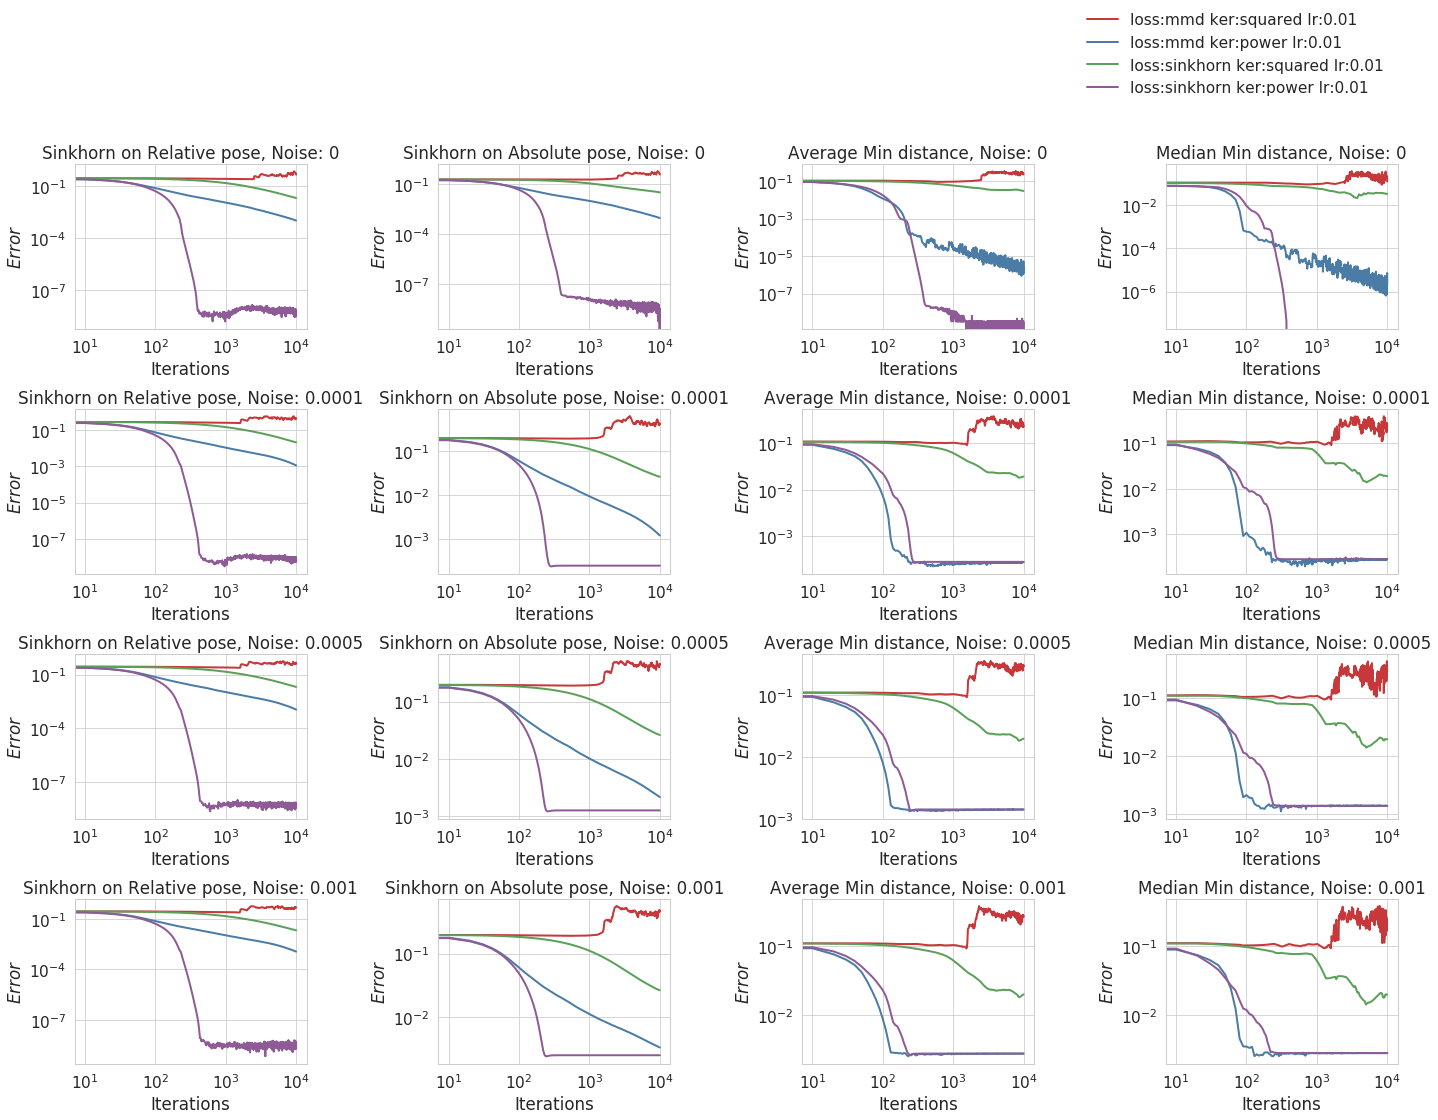

In [21]:
num_fig = 4
fig, ax = plt.subplots(4,num_fig, figsize=(20,16))
titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
value = 'eval_RM_dist'
xaxis = 'iteration'
refresh=  True
for i in range(4):
    
    plot_from_dict(ax[i,0],all_res_dict[i], xaxis, 'eval_RM_dist', all_colors_dict[i])
    plot_from_dict(ax[i,1],all_res_dict[i], xaxis, 'eval_dist', all_colors_dict[i])
    plot_from_dict(ax[i,2],all_res_dict[i], xaxis, 'avg_min_dist', all_colors_dict[i])
    plot_from_dict(ax[i,3],all_res_dict[i], xaxis, 'median_min_dist', all_colors_dict[i])

titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
set_axis_prop(ax, titles,sub_titles)
ax[0,-1].legend(bbox_to_anchor=(1., 2.),frameon=False)
fig.tight_layout()
filename = 'synth_1_gt'
save(filename)

In [48]:
exp_path = '/nfs/data/michaela/projects/OptSync/synth_2_particles/synth_2_particles/'
subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0','comp':'0.2'}


res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)

subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.0001','comp':'0.2'}

res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)

subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.0005','comp':'0.2'}
res_dicts_3, color_dict_3 = get_selected_res(exp_path,subset_dictionary)


subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.001','comp':'0.2'}
res_dicts_iter_4, color_dict_iter_4 = get_selected_res(exp_path,subset_dictionary)


all_res_dict = [res_dicts_1,res_dicts_2,res_dicts_3,res_dicts_iter_4]
all_colors_dict = [color_dict_1,color_dict_2,color_dict_3,color_dict_iter_4]

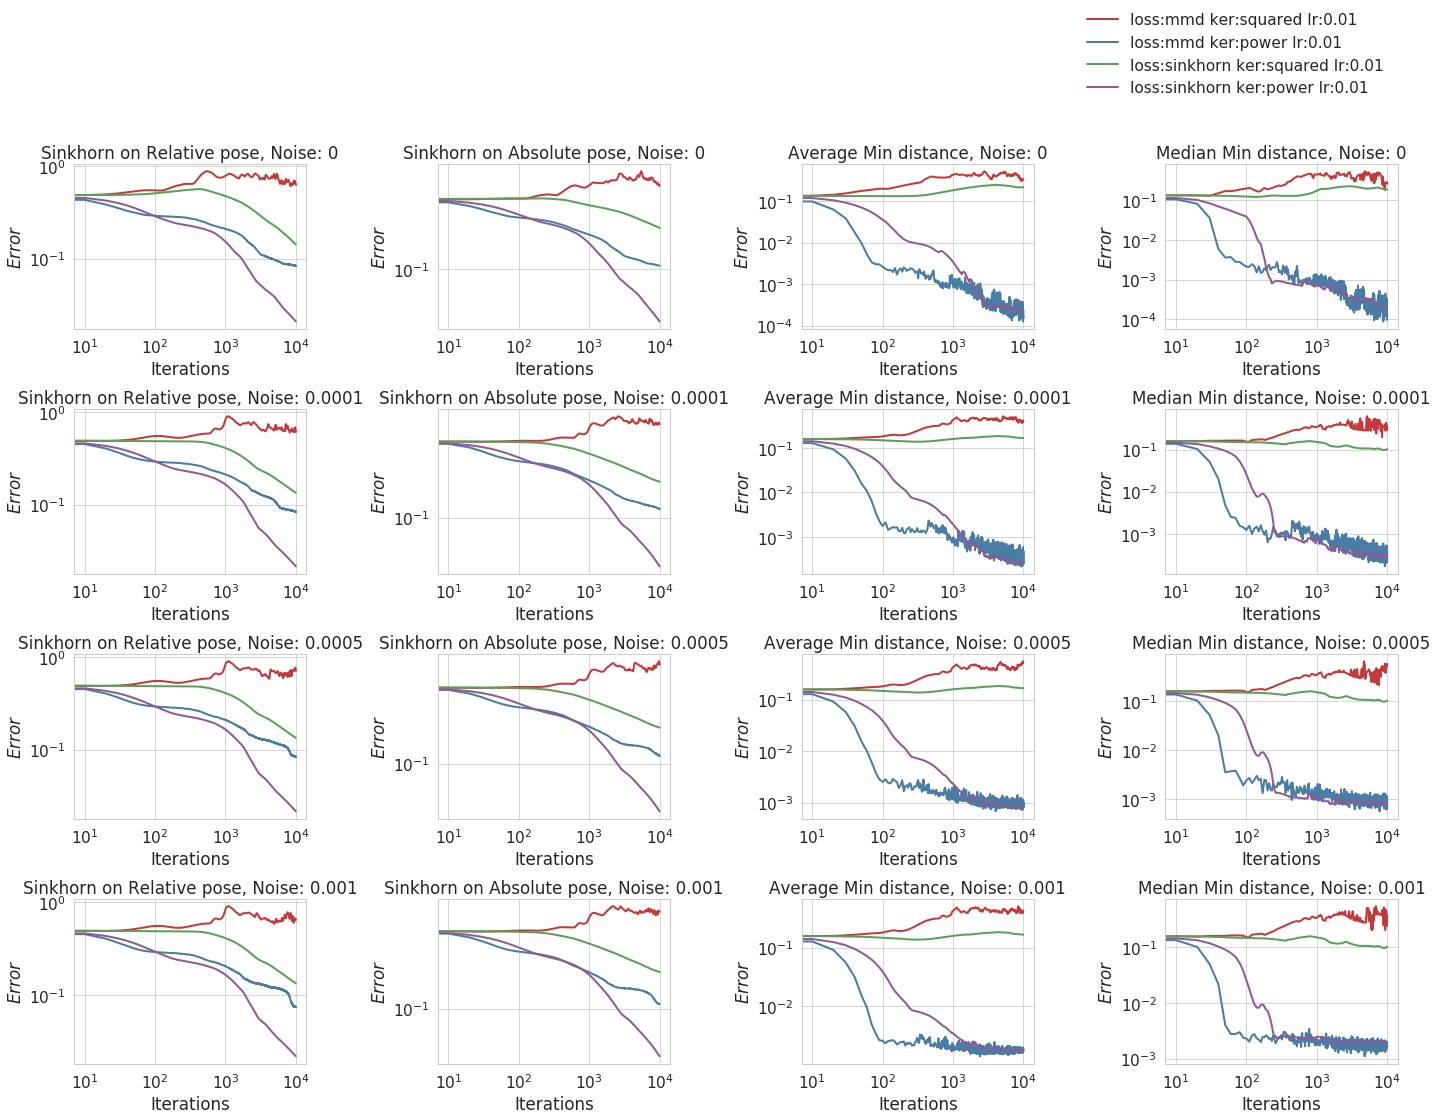

In [49]:
num_fig = 4
fig, ax = plt.subplots(4,num_fig, figsize=(20,16))
titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
value = 'eval_RM_dist'
xaxis = 'iteration'
refresh=  True
for i in range(4):
    
    plot_from_dict(ax[i,0],all_res_dict[i], xaxis, 'eval_RM_dist', all_colors_dict[i])
    plot_from_dict(ax[i,1],all_res_dict[i], xaxis, 'eval_dist', all_colors_dict[i])
    plot_from_dict(ax[i,2],all_res_dict[i], xaxis, 'avg_min_dist', all_colors_dict[i])
    plot_from_dict(ax[i,3],all_res_dict[i], xaxis, 'median_min_dist', all_colors_dict[i])

titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
set_axis_prop(ax, titles,sub_titles)
ax[0,-1].legend(bbox_to_anchor=(1., 2.),frameon=False)
fig.tight_layout()
filename = 'synth_2_gt'
save(filename)

In [27]:
exp_path = '/nfs/data/michaela/projects/OptSync/synth_3_particles/synth_3_particles/'
subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0','comp':'0.2'}


res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)

subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.0001','comp':'0.2'}

res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)

subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.0005','comp':'0.2'}
res_dicts_3, color_dict_3 = get_selected_res(exp_path,subset_dictionary)


subset_dictionary = {'opt':'SGD','N':'10','pow':'1.2','sigma':'0.001','comp':'0.2'}
res_dicts_4, color_dict_4 = get_selected_res(exp_path,subset_dictionary)


all_res_dict = [res_dicts_1,res_dicts_2,res_dicts_3,res_dicts_4]
all_colors_dict = [color_dict_1,color_dict_2,color_dict_3,color_dict_4]

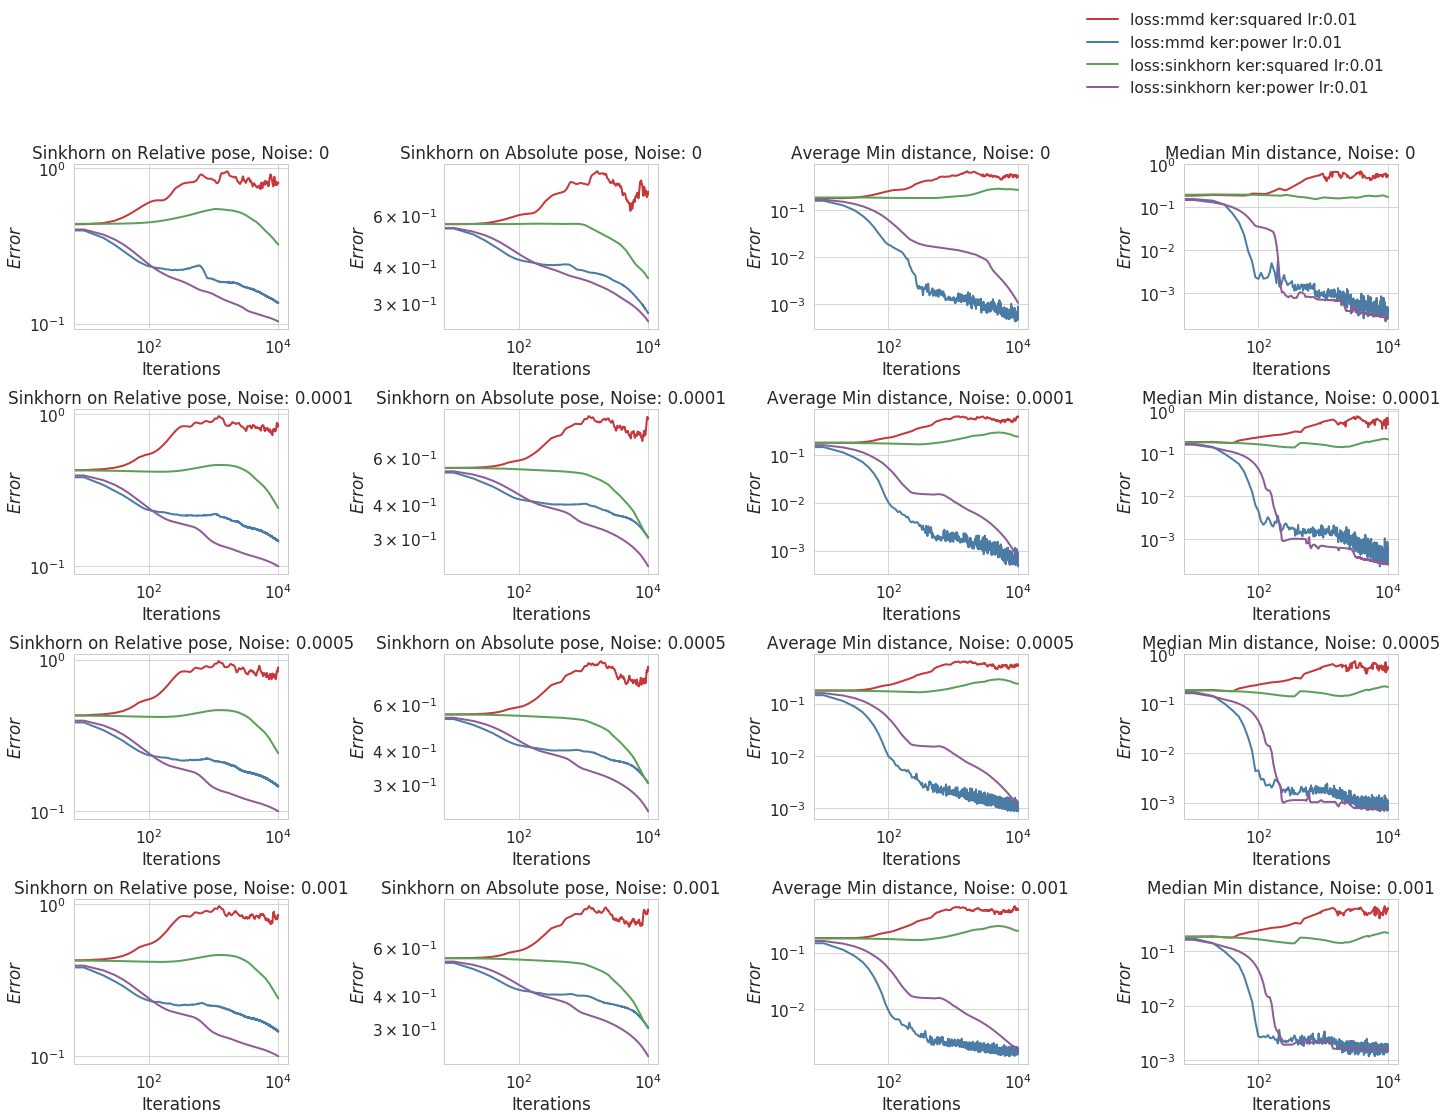

In [28]:
num_fig = 4
fig, ax = plt.subplots(4,num_fig, figsize=(20,16))
titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
value = 'eval_RM_dist'
xaxis = 'iteration'
refresh=  True
for i in range(4):
    
    plot_from_dict(ax[i,0],all_res_dict[i], xaxis, 'eval_RM_dist', all_colors_dict[i])
    plot_from_dict(ax[i,1],all_res_dict[i], xaxis, 'eval_dist', all_colors_dict[i])
    plot_from_dict(ax[i,2],all_res_dict[i], xaxis, 'avg_min_dist', all_colors_dict[i])
    plot_from_dict(ax[i,3],all_res_dict[i], xaxis, 'median_min_dist', all_colors_dict[i])

titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
set_axis_prop(ax, titles,sub_titles)
ax[0,-1].legend(bbox_to_anchor=(1., 2.),frameon=False)
fig.tight_layout()
filename = 'synth_3_gt'
save(filename)

In [25]:
exp_path = '/nfs/data/michaela/projects/OptSync/synth_increase_noise/synth_increase_noise/'
subset_dictionary = {'N':'10','pow':'1.2','comp':'0.2','lr':'0.01'}
item_id = 3
xaxis = 'sigma'
res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)
res_dicts_noise_1 = get_selected_res_by(res_dicts_1,xaxis)
color_dict_noise_1 = make_color_dic(res_dicts_noise_1)


subset_dictionary = {'N':'10','pow':'1.2','comp':'0.5','lr':'0.01'}
res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)
res_dicts_noise_2 = get_selected_res_by(res_dicts_2,xaxis)
color_dict_noise_2=   make_color_dic(res_dicts_noise_2)


subset_dictionary = {'N':'10','pow':'1.2','comp':'0.7','lr':'0.01'}
#res_dicts_3, color_dict_3 = get_selected_res(exp_path,subset_dictionary)
#res_dicts_3 = get_selected_res_by(res_dicts_3,xaxis)
#color_dict_3=   make_color_dic(res_dicts_3)

#all_res_dict = [res_dicts_1,res_dicts_2,res_dicts_3]
#all_colors_dict = [color_dict_1,color_dict_2,color_dict_3]


all_res_dict = [res_dicts_noise_1,res_dicts_noise_2]
all_colors_dict = [color_dict_noise_1,color_dict_noise_2]

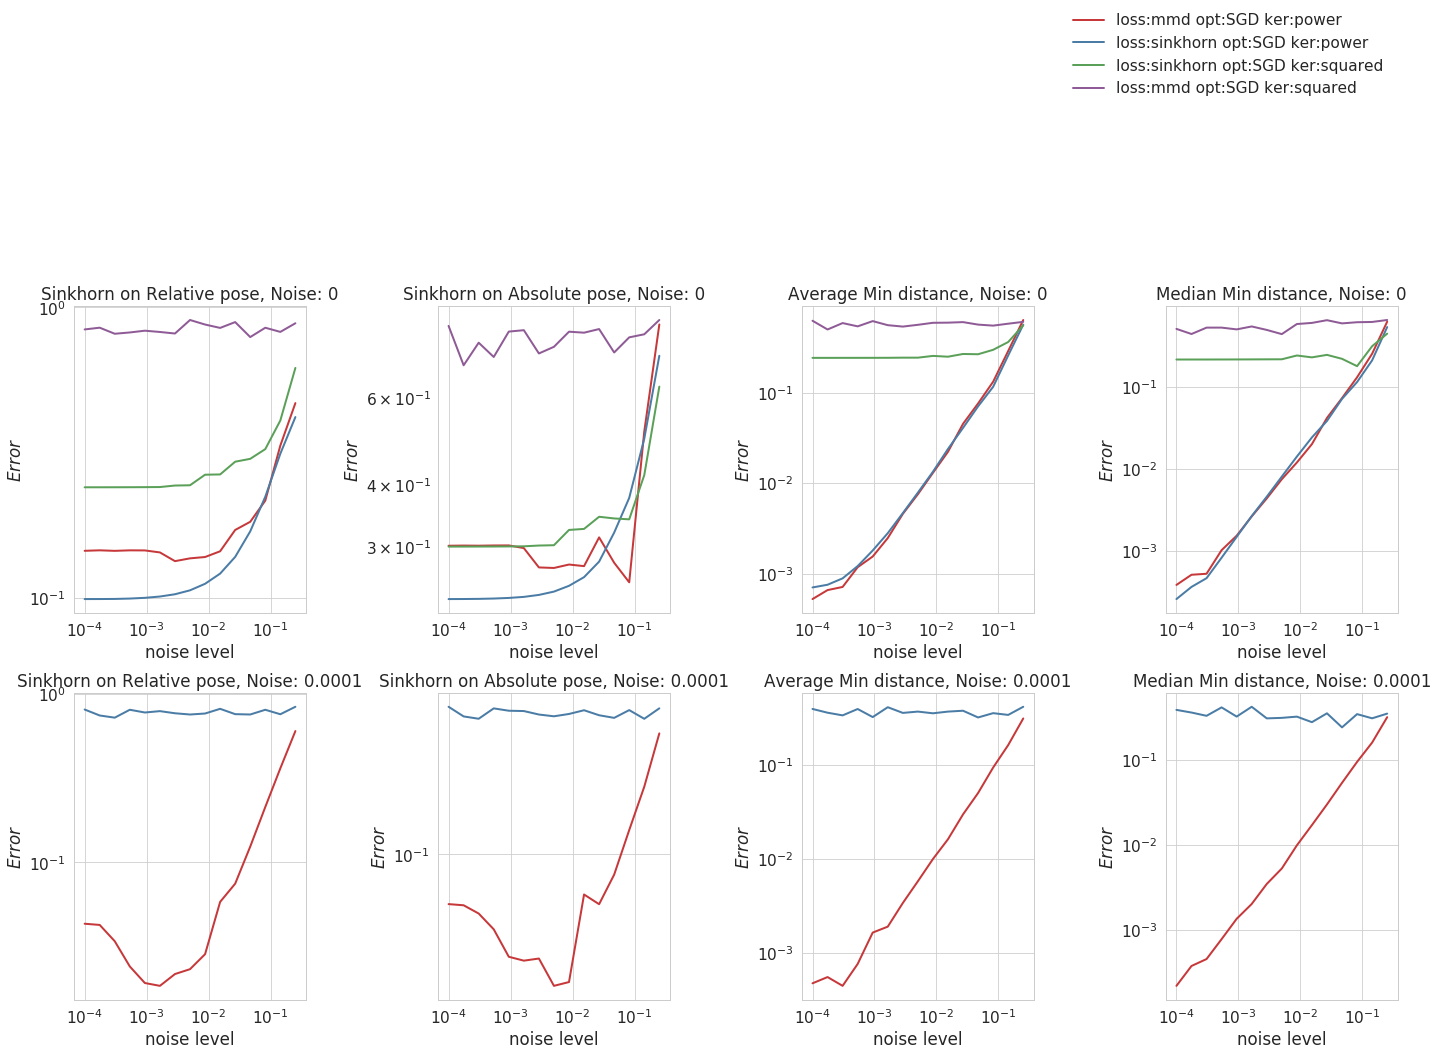

In [26]:
num_fig_1 = 2
num_fig_2 = 4
fig, ax = plt.subplots(num_fig_1,num_fig_2, figsize=(20,16))
titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
value = 'eval_RM_dist'
xaxis = 'sigma'
refresh=  True
for i in range(num_fig_1):
    plot_from_dict(ax[i,0],all_res_dict[i], xaxis, 'eval_RM_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,1],all_res_dict[i], xaxis, 'eval_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,2],all_res_dict[i], xaxis, 'avg_min_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,3],all_res_dict[i], xaxis, 'median_min_dist', all_colors_dict[i],sort=True)

titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
set_axis_prop(ax, titles,sub_titles,xlabel='noise level')
ax[0,-1].legend(bbox_to_anchor=(1., 2.),frameon=False)
fig.tight_layout()
filename = 'synth_increasing_noise'
save(filename)

In [33]:
exp_path = '/nfs/data/michaela/projects/OptSync/synth_completeness/synth_completeness/'
subset_dictionary = {'N':'10','pow':'1.2','sigma':'0.0','lr':'0.01'}
item_id = 0
xaxis = 'comp'
res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)
res_dicts_comp_1 = get_selected_res_by(res_dicts_1,xaxis)
color_dict_comp_1 = make_color_dic(res_dicts_comp_1)


subset_dictionary = {'N':'10','pow':'1.2','sigma':'0.001','lr':'0.01'}
res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)
res_dicts_comp_2 = get_selected_res_by(res_dicts_2,xaxis)
color_dict_comp_2=   make_color_dic(res_dicts_comp_2)


subset_dictionary = {'N':'10','pow':'1.2','sigma':'0.01','lr':'0.01'}
res_dicts_3, color_dict_3 = get_selected_res(exp_path,subset_dictionary)
res_dicts_comp_3 = get_selected_res_by(res_dicts_3,xaxis)
color_dict_comp_3=   make_color_dic(res_dicts_comp_3)



subset_dictionary = {'N':'10','pow':'1.2','sigma':'0.1','lr':'0.01'}
res_dicts_4, color_dict_4 = get_selected_res(exp_path,subset_dictionary)
res_dicts_comp_4 = get_selected_res_by(res_dicts_4,xaxis)
color_dict_comp_4=   make_color_dic(res_dicts_comp_4)

all_res_dict = [res_dicts_comp_1,res_dicts_comp_2,res_dicts_comp_3,res_dicts_comp_4]
all_colors_dict = [color_dict_comp_1,color_dict_comp_2,color_dict_comp_3,color_dict_comp_4]

In [42]:
color_dict_comp_3 

{'loss:mmd opt:SGD ker:power': (0.7752941176470588,
  0.22078431372549023,
  0.2262745098039215),
 'loss:sinkhorn opt:SGD ker:power': (0.29156862745098033,
  0.48647058823529415,
  0.645686274509804),
 'loss:sinkhorn opt:SGD ker:squared': (0.35784313725490197,
  0.6268627450980393,
  0.3496078431372549),
 'loss:mmd opt:SGD ker:squared': (0.5590196078431375,
  0.3558823529411764,
  0.5892156862745098)}

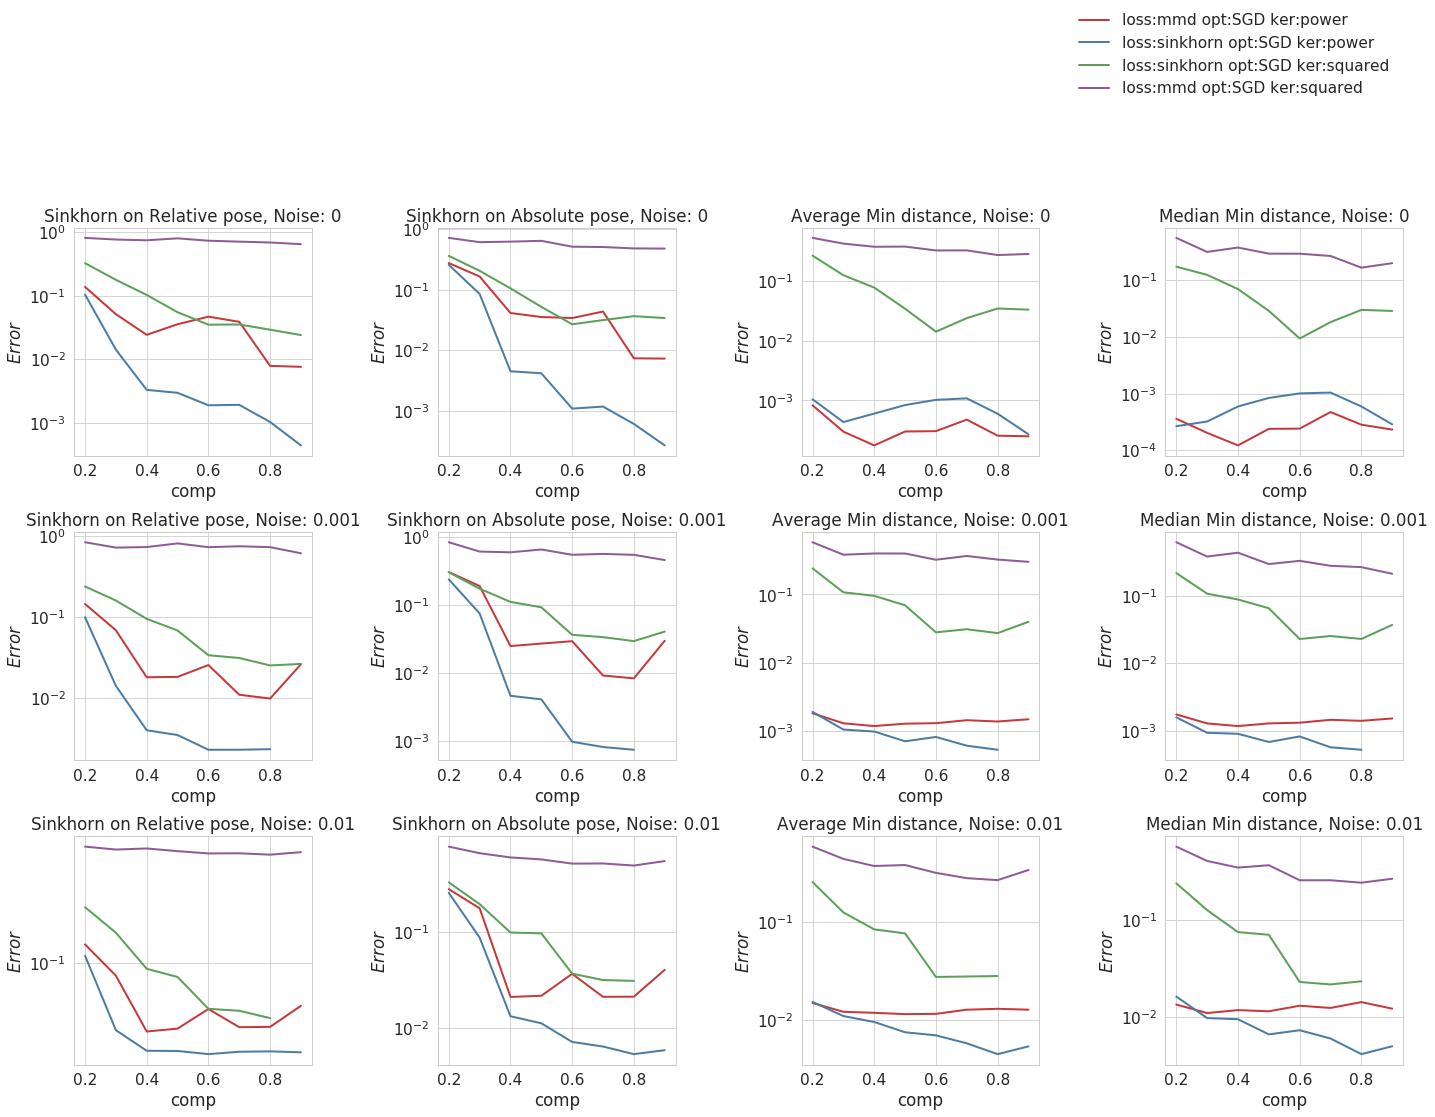

In [43]:
all_res_dict = [res_dicts_comp_1,res_dicts_comp_2,res_dicts_comp_3,res_dicts_comp_4]
all_colors_dict = [color_dict_comp_1,color_dict_comp_2,color_dict_comp_3,color_dict_comp_4]
num_fig_1 = 3
num_fig_2 = 4
fig, ax = plt.subplots(num_fig_1,num_fig_2, figsize=(20,16))

value = 'eval_RM_dist'
xaxis = 'comp'
refresh=  True
for i in range(num_fig_1):
    plot_from_dict(ax[i,0],all_res_dict[i], xaxis, 'eval_RM_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,1],all_res_dict[i], xaxis, 'eval_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,2],all_res_dict[i], xaxis, 'avg_min_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,3],all_res_dict[i], xaxis, 'median_min_dist', all_colors_dict[i],sort=True)

titles = ['Noise: 0', 'Noise: 0.001','Noise: 0.01','Noise: 0.1']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
set_axis_prop(ax, titles,sub_titles,xlabel=xaxis,scale_x= 'linear')
ax[0,-1].legend(bbox_to_anchor=(1., 2.),frameon=False)
fig.tight_layout()
filename = 'synth_completeness'
save(filename)

In [18]:
exp_path = '/nfs/data/michaela/projects/OptSync/synth_num_particles/synth_num_particles/'
subset_dictionary = {'pow':'1.2','comp':'0.2','sigma':'0.0','lr':'0.01'}
xaxis = 'N'
res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)
res_dicts_N_1 = get_selected_res_by(res_dicts_1,xaxis)
color_dict_N_1 = make_color_dic(res_dicts_N_1)


subset_dictionary = {'pow':'1.2','comp':'0.5','sigma':'0.0','lr':'0.01'}
res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)
res_dicts_N_2 = get_selected_res_by(res_dicts_2,xaxis)
color_dict_N_2=   make_color_dic(res_dicts_N_2)


subset_dictionary = {'pow':'1.2','comp':'0.2','sigma':'0.01','lr':'0.01'}
xaxis = 'N'
res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)
res_dicts_N_3 = get_selected_res_by(res_dicts_1,xaxis)
color_dict_N_3 = make_color_dic(res_dicts_N_3)


subset_dictionary = {'pow':'1.2','comp':'0.5','sigma':'0.01','lr':'0.01'}
res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)
res_dicts_N_4 = get_selected_res_by(res_dicts_2,xaxis)
color_dict_N_4=   make_color_dic(res_dicts_N_4)



all_res_dict = [res_dicts_N_1,res_dicts_N_2,res_dicts_N_3,res_dicts_N_4]
all_colors_dict = [color_dict_N_1,color_dict_N_2,color_dict_N_3,color_dict_N_4]

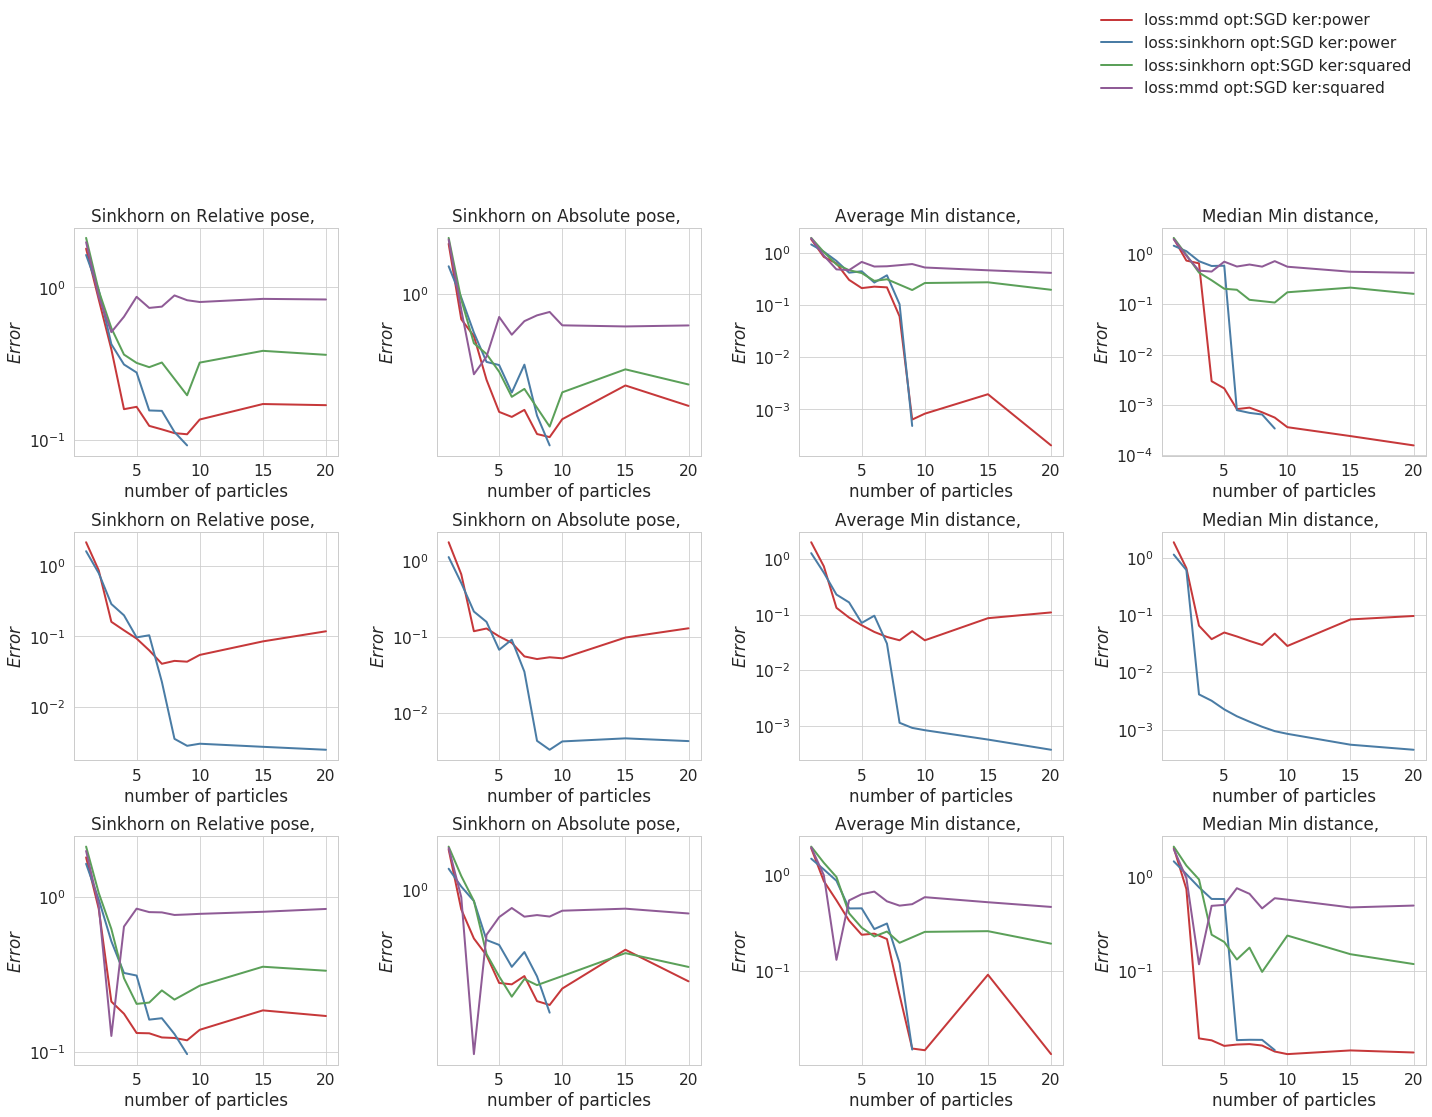

In [20]:
all_res_dict = [res_dicts_N_1,res_dicts_N_2,res_dicts_N_3,res_dicts_N_4]
all_colors_dict = [color_dict_N_1,color_dict_N_2,color_dict_N_3,color_dict_N_4]
num_fig_1 = 3
num_fig_2 = 4
fig, ax = plt.subplots(num_fig_1,num_fig_2, figsize=(20,16))
titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
value = 'eval_RM_dist'
xaxis = 'N'
refresh=  True
for i in range(num_fig_1):
    plot_from_dict(ax[i,0],all_res_dict[i], xaxis, 'eval_RM_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,1],all_res_dict[i], xaxis, 'eval_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,2],all_res_dict[i], xaxis, 'avg_min_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,3],all_res_dict[i], xaxis, 'median_min_dist', all_colors_dict[i],sort=True)

titles = ['comp:0.2, sigma:0', 'comp:0.5, sigma:0', 'comp:0.2, sigma:0.01','comp:0.5, sigma:0.01']
titles = ['','','','']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
set_axis_prop(ax, titles,sub_titles,xlabel='number of particles',scale_x='linear')
ax[0,-1].legend(bbox_to_anchor=(1., 2.),frameon=False)
fig.tight_layout()
filename = 'synth_num_particles'
save(filename)

In [23]:
exp_path = '/nfs/data/michaela/projects/OptSync/synth_unfaithfulness/synth_unfaithfulness/'
subset_dictionary = {'pow':'1.2','comp':'0.2','sigma':'0.0','lr':'0.01'}
xaxis = 'N'
res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)
res_dicts_UN_1 = get_selected_res_by(res_dicts_1,xaxis)
color_dict_UN_1 = make_color_dic(res_dicts_UN_1)


subset_dictionary = {'pow':'1.2','comp':'0.5','sigma':'0.0','lr':'0.01'}
res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)
res_dicts_UN_2 = get_selected_res_by(res_dicts_2,xaxis)
color_dict_UN_2=   make_color_dic(res_dicts_UN_2)


subset_dictionary = {'pow':'1.2','comp':'0.2','sigma':'0.01','lr':'0.01'}
xaxis = 'N'
res_dicts_1, color_dict_1 = get_selected_res(exp_path,subset_dictionary)
res_dicts_UN_3 = get_selected_res_by(res_dicts_1,xaxis)
color_dict_UN_3 = make_color_dic(res_dicts_UN_3)


subset_dictionary = {'pow':'1.2','comp':'0.5','sigma':'0.01','lr':'0.01'}
res_dicts_2, color_dict_2 = get_selected_res(exp_path,subset_dictionary)
res_dicts_UN_4 = get_selected_res_by(res_dicts_2,xaxis)
color_dict_UN_4=   make_color_dic(res_dicts_UN_4)



all_res_dict = [res_dicts_UN_1,res_dicts_UN_2,res_dicts_UN_3,res_dicts_UN_4]
all_colors_dict = [color_dict_UN_1,color_dict_UN_2,color_dict_UN_3,color_dict_UN_4]

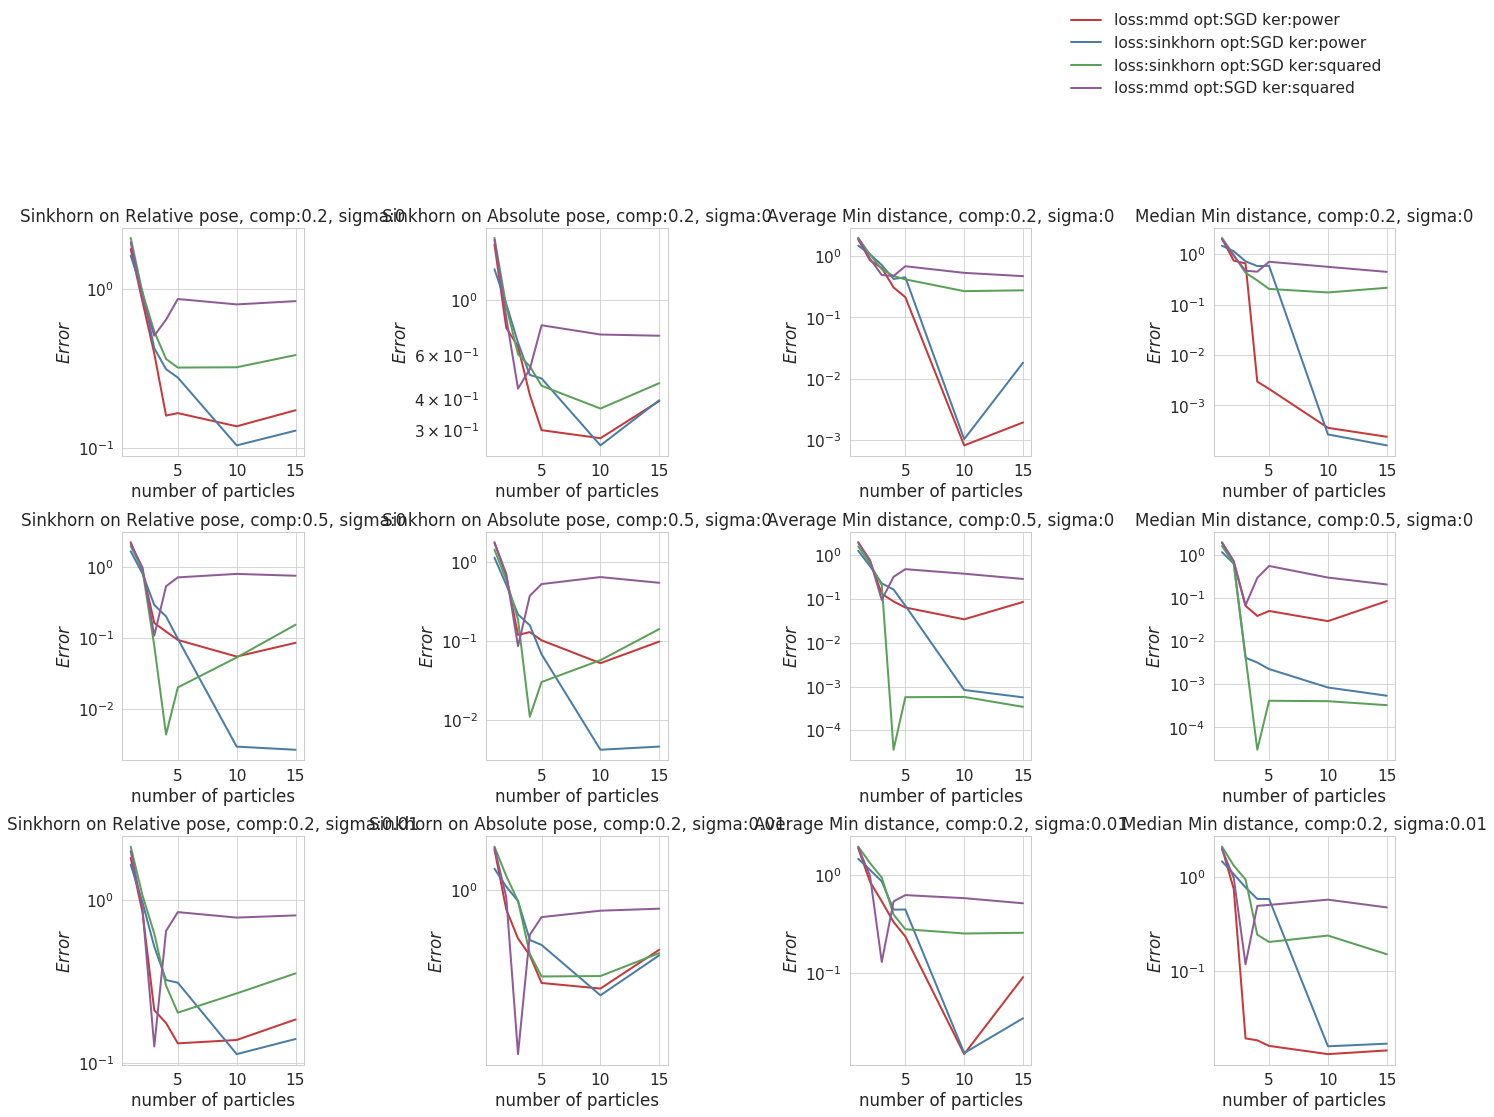

In [24]:
all_res_dict = [res_dicts_UN_1,res_dicts_UN_2,res_dicts_UN_3,res_dicts_UN_4]
all_colors_dict = [color_dict_UN_1,color_dict_UN_2,color_dict_UN_3,color_dict_UN_4]
num_fig_1 = 3
num_fig_2 = 4
fig, ax = plt.subplots(num_fig_1,num_fig_2, figsize=(20,16))
titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
value = 'eval_RM_dist'
xaxis = 'N'
refresh=  True
for i in range(num_fig_1):
    plot_from_dict(ax[i,0],all_res_dict[i], xaxis, 'eval_RM_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,1],all_res_dict[i], xaxis, 'eval_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,2],all_res_dict[i], xaxis, 'avg_min_dist', all_colors_dict[i],sort=True)
    plot_from_dict(ax[i,3],all_res_dict[i], xaxis, 'median_min_dist', all_colors_dict[i],sort=True)

titles = ['comp:0.2, sigma:0', 'comp:0.5, sigma:0', 'comp:0.2, sigma:0.01','comp:0.5, sigma:0.01']
titles = ['','','','']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
set_axis_prop(ax, titles,sub_titles,xlabel='number of particles',scale_x='linear')
ax[0,-1].legend(bbox_to_anchor=(1., 2.),frameon=False)
fig.tight_layout()
filename = 'synth_unfaithfulness'
save(filename)

In [60]:

def plot_from_dict(ax,res_dicts, xaxis, value, color_dict,sort=False,lw=2.):
	#res_dicts = get_res(path_dict,refresh=refresh)

		for key in res_dicts.keys():
			if xaxis=='time':

				ax.plot(res_dicts[key][xaxis]-res_dicts[key][xaxis][0],res_dicts[key][value], lw=lw, label=key,color = color_dict[key])
			else:
				if 	sort:
					order = np.argsort(res_dicts[key][xaxis])
					xs = np.array(res_dicts[key][xaxis])[order]
					ys = np.array(res_dicts[key][value])[order]
					ax.plot(xs,ys, lw=lw, label=key,color = color_dict[key])
				else:
					ax.plot(res_dicts[key][xaxis],res_dicts[key][value], lw=lw, label=key,color = color_dict[key])


In [67]:
color_dict_iter_4
new_color_dict_iter_4 = {}
new_color_dict_iter_4['loss:mmd ker:squared lr:0.01'] =  color_dict_comp_3['loss:mmd opt:SGD ker:squared']
new_color_dict_iter_4['loss:mmd ker:power lr:0.01'] =  color_dict_comp_3['loss:mmd opt:SGD ker:power']

new_color_dict_iter_4['loss:sinkhorn ker:squared lr:0.01'] =  color_dict_comp_3['loss:sinkhorn opt:SGD ker:squared']

new_color_dict_iter_4['loss:sinkhorn ker:power lr:0.01'] =  color_dict_comp_3['loss:sinkhorn opt:SGD ker:power']




In [65]:
color_dict_comp_3

{'loss:mmd opt:SGD ker:power': (0.7752941176470588,
  0.22078431372549023,
  0.2262745098039215),
 'loss:sinkhorn opt:SGD ker:power': (0.29156862745098033,
  0.48647058823529415,
  0.645686274509804),
 'loss:sinkhorn opt:SGD ker:squared': (0.35784313725490197,
  0.6268627450980393,
  0.3496078431372549),
 'loss:mmd opt:SGD ker:squared': (0.5590196078431375,
  0.3558823529411764,
  0.5892156862745098)}

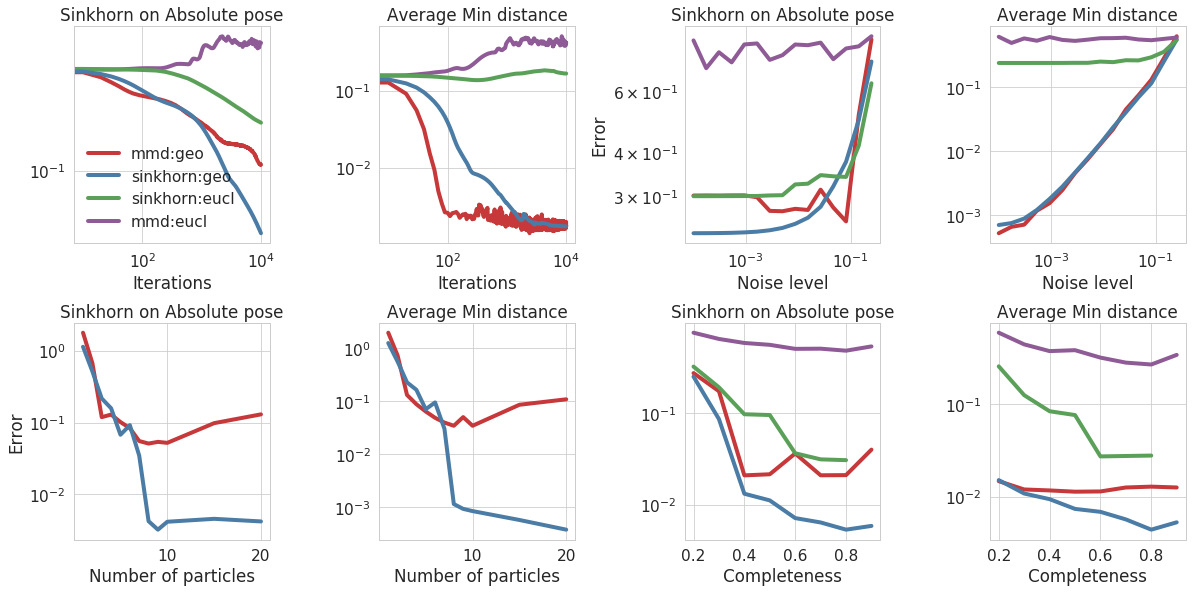

In [91]:
all_res_dict = [res_dicts_UN_1,res_dicts_UN_2,res_dicts_UN_3,res_dicts_UN_4]
all_colors_dict = [color_dict_UN_1,color_dict_UN_2,color_dict_UN_3,color_dict_UN_4]
num_fig_1 = 2
num_fig_2 = 4
fig, ax = plt.subplots(num_fig_1,num_fig_2, figsize=(20/1.2,10/1.2))
xaxis = 'N'
refresh=  True


j_s = 2
j_iter = 0
j_N = 0
j_comp = 2 
lw=4.
i=0



plot_from_dict(ax[i,j_iter],res_dicts_iter_4, 'iteration', 'eval_dist', new_color_dict_iter_4,sort=True,lw=lw)
plot_from_dict(ax[i,j_iter+1],res_dicts_iter_4, 'iteration', 'avg_min_dist', new_color_dict_iter_4,sort=True,lw=lw)

plot_from_dict(ax[i,j_s],res_dicts_noise_1, 'sigma', 'eval_dist', color_dict_noise_1,sort=True,lw=lw)
plot_from_dict(ax[i,j_s+1],res_dicts_noise_1, 'sigma', 'avg_min_dist', color_dict_noise_1,sort=True,lw=lw)


i=1

plot_from_dict(ax[i,j_N],res_dicts_N_2, 'N', 'eval_dist', color_dict_N_2,sort=True,lw=lw)
plot_from_dict(ax[i,j_N+1],res_dicts_N_2, 'N', 'avg_min_dist', color_dict_N_2,sort=True,lw=lw)

plot_from_dict(ax[i,j_comp],res_dicts_comp_3, 'comp', 'eval_dist', color_dict_comp_3,sort=True,lw=lw)
plot_from_dict(ax[i,j_comp+1],res_dicts_comp_3, 'comp', 'avg_min_dist', color_dict_comp_3,sort=True,lw=lw)


i=0


ax[i,j_iter].set_title('Sinkhorn on Absolute pose')
ax[i,j_iter].set_xscale('log')
ax[i,j_iter].set_yscale('log')
ax[i,j_iter].set_ylabel('')
ax[i,j_iter].set_xlabel('Iterations')

ax[i,j_iter+1].set_title('Average Min distance')
ax[i,j_iter+1].set_xscale('log')
ax[i,j_iter+1].set_yscale('log')
ax[i,j_iter+1].set_ylabel('')
ax[i,j_iter+1].set_xlabel('Iterations')







ax[i,j_s].set_title('Sinkhorn on Absolute pose')
ax[i,j_s].set_xscale('log')
ax[i,j_s].set_yscale('log')
ax[i,j_s].set_ylabel('Error')
ax[i,j_s].set_xlabel('Noise level')

ax[i,j_s+1].set_title('Average Min distance')
ax[i,j_s+1].set_xscale('log')
ax[i,j_s+1].set_yscale('log')
ax[i,j_s+1].set_ylabel('')
ax[i,j_s+1].set_xlabel('Noise level')


i=1



ax[i,j_N].set_title('Sinkhorn on Absolute pose')
ax[i,j_N].set_xscale('linear')
ax[i,j_N].set_yscale('log')
ax[i,j_N].set_ylabel('Error')
ax[i,j_N].set_xlabel('Number of particles')

ax[i,j_N+1].set_title('Average Min distance')
ax[i,j_N+1].set_xscale('linear')
ax[i,j_N+1].set_yscale('log')
ax[i,j_N+1].set_ylabel('')
ax[i,j_N+1].set_xlabel('Number of particles')


ax[i,j_comp].set_title('Sinkhorn on Absolute pose')
ax[i,j_comp].set_xscale('linear')
ax[i,j_comp].set_yscale('log')
ax[i,j_comp].set_ylabel('')
ax[i,j_comp].set_xlabel('Completeness')


ax[i,j_comp+1].set_title('Average Min distance')
ax[i,j_comp+1].set_xscale('linear')
ax[i,j_comp+1].set_yscale('log')
ax[i,j_comp+1].set_ylabel('')
ax[i,j_comp+1].set_xlabel('Completeness')










#plot_from_dict(ax[i,2],all_res_dict[i], xaxis, 'avg_min_dist', all_colors_dict[i],sort=True)
#plot_from_dict(ax[i,3],all_res_dict[i], xaxis, 'median_min_dist', all_colors_dict[i],sort=True)

titles = ['comp:0.2, sigma:0', 'comp:0.5, sigma:0', 'comp:0.2, sigma:0.01','comp:0.5, sigma:0.01']
titles = ['','','','']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
#set_axis_prop(ax, titles,sub_titles,xlabel='number of particles',scale_x='linear')
handles, labels = ax[0,-1].get_legend_handles_labels()
labels_2 = ['mmd:geo',
 'sinkhorn:geo',
 'sinkhorn:eucl',
 'mmd:eucl']
ax[0,0].legend(handles, labels_2, frameon=False)
#ax[0,-1].legend(bbox_to_anchor=(1., 1.),frameon=False)
fig.tight_layout()
filename = 'summary_fig'
save(filename)

In [6]:
exp_path = '/nfs/data/michaela/projects/OptSync/'
exp_name  = 'synthetic'
res_path_prod_particles_no_weights = {
    'Product loss':exp_path+'marker_no_gt_mode/real_data_prod_true_N_1_noise_-1.0_B_noise_-1.0_unfaithfulness_false/Np_10_opt_SGD_pow_1.2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/0',
    'Product loss (GT rel)':exp_path+'marker_gt_mode/real_data_prod_true_N_1_noise_-1.0_B_noise_-1.0_unfaithfulness_false/Np_10_opt_SGD_pow_1.2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_product/0',
    'Joint loss':exp_path+'marker_no_prod_gt_mode/real_data_prod_true_N_1_noise_-1.0_B_noise_-1.0_unfaithfulness_false/Np_10_opt_SGD_pow_1.2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_joint/0',
    'Joint loss (GT rel)':exp_path+'marker_no_prod_gt_mode/real_data_prod_true_N_1_noise_-1.0_B_noise_-1.0_unfaithfulness_false/Np_10_opt_SGD_pow_1.2_loss_sinkhorn_kernel_power_quaternion_with_weights_RM_joint/0',
}
res_path = res_path_prod_particles_no_weights

#res_path = res_path_prod_particles_with_weights


colors = sns.color_palette("Set1", n_colors=len(res_path), desat=.7)

color_dict ={}
for i, key in enumerate(res_path.keys()):
    color_dict[key] = colors[i]
refresh = True
res_dicts = get_res(res_path,refresh=refresh)



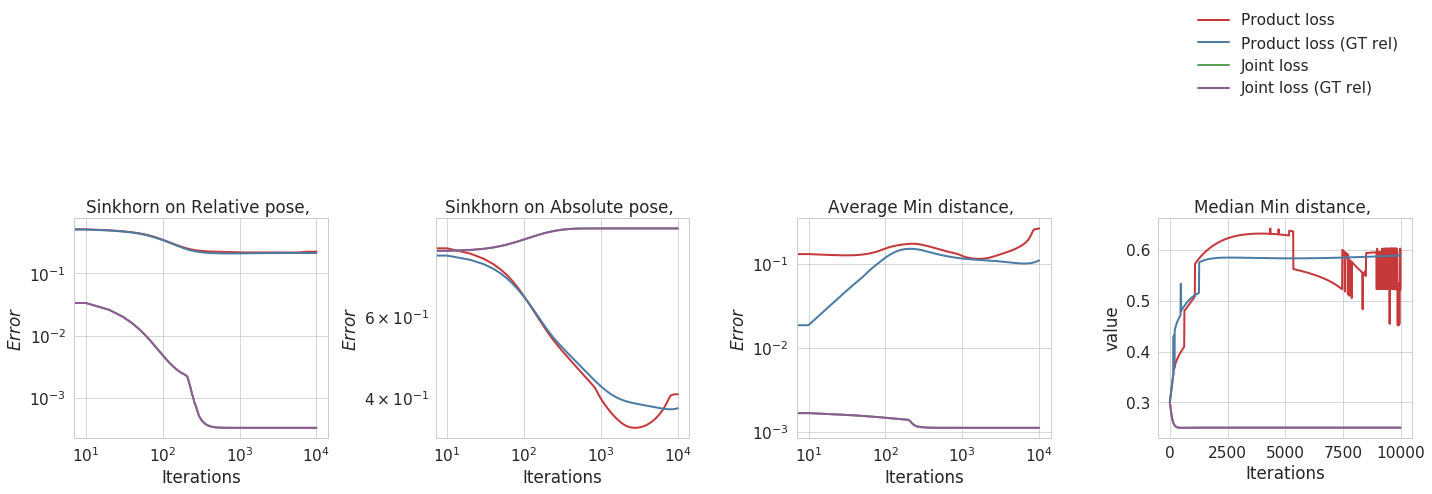

In [11]:
num_fig = 4
fig, ax = plt.subplots(1,num_fig, figsize=(20,16))
titles = ['Noise: 0', 'Noise: 0.0001','Noise: 0.0005','Noise: 0.001']
value = 'eval_RM_dist'
xaxis = 'iteration'
refresh=  True

    
plot_from_dict(ax[0],res_dicts, xaxis, 'eval_RM_dist', color_dict)
plot_from_dict(ax[1],res_dicts, xaxis, 'eval_dist', color_dict)
plot_from_dict(ax[2],res_dicts, xaxis, 'avg_min_dist', color_dict)
plot_from_dict(ax[3],res_dicts, xaxis, 'mode_weights', color_dict)

ax[3].set_title('weight of the mode')



titles = ['','','','','']
sub_titles = ['Sinkhorn on Relative pose', 'Sinkhorn on Absolute pose', 'Average Min distance', 'Median Min distance']
set_axis_prop(ax, titles,sub_titles)
ax[3].set_xscale('linear')
ax[3].set_yscale('linear')
ax[3].set_ylabel('value')
ax[-1].legend(bbox_to_anchor=(1., 2.),frameon=False)
fig.tight_layout()
filename = 'marker'
save(filename)



In [7]:
res_dicts['Product loss'].keys()

dict_keys(['eval_RM_dist', 'eval_dist', 'loss', 'iteration', 'time', 'avg_min_dist', 'median_min_dist'])

In [17]:

#eng.addpath('bingham', nargout=0)
#eng.addpath('bingham/tools', nargout=0)
#eng.addpath('bingham/visualization', nargout=0)

# The quality of the rendering. It is super slow so for testing I always set it to 50 and for the final renderings back to 400!
quality = 50

# Each element of the list is a list of quaternions for the bingham distribution
distributions = []

# random distributions made of quaternions for testing
bingham_1 = [[0.7, 0.3, -0.1, 0.2], [0.6, 0.35, -0.16, 0.15],[0.5, 0.2, -0.4, -0.2], [0.4, 0.1, -0.4, -0.2]]


bingham_2 = [[1, 0, 0, 0], [1, 0., 0, 0]]

# normalize quats
bingham_1 = np.asarray(bingham_1)
bingham_2 = np.asarray(bingham_2)

bingham_1 /= np.linalg.norm(bingham_1, axis=1, keepdims=True)
bingham_2 /= np.linalg.norm(bingham_2, axis=1, keepdims=True)

# adding the distributions to the list and convert them to matlab
distributions.append(matlab.double(bingham_1.tolist()))
distributions.append(matlab.double(bingham_2.tolist()))


# GT if not set to None then a green cross will be superimposed at this position as GT quaternion
# gt = [q_gt, -q_gt]
gt = np.asarray([[0.7, 0.3, -0.1, 0.2], [-0.7, -0.3, 0.1, -0.2]])
gt /= np.linalg.norm(gt, axis=1, keepdims=True)

# plotting!
bingham = db.get_bingham(eng, distributions, GT=None, precision=quality) /255.# without ground truth
bingham_gt = db.get_bingham(eng, distributions, GT=gt, precision=quality) / 255. # with ground truth

#db.fit()

# show on display with and without gt
#cv2.imshow('bingham', cv2.hconcat([bingham, bingham_gt]))
#cv2.waitKey(0)


MatlabExecutionError: Too many output arguments.


In [ ]:
#aa = cv2.hconcat([bingham])
plt.imshow(bingham)




In [ ]:
iteration = 0
out_dict0 = get_all_particles(res_path,iteration)
iteration = 9990
out_dict = get_all_particles(res_path,iteration)


In [ ]:
aa = 1.*out_dict0['Sinkhorn: PowerQuaternion']['particles']

In [ ]:

out_dict0['Sinkhorn: PowerQuaternion']['true_particles'],out_dict['Sinkhorn: PowerQuaternion']['particles']

In [ ]:
iterations = [0,10,100,1000,9990]
#iterations = [0,100]
method = 'Sinkhorn: PowerQuaternion'
num_cameras = 4
bingham_fits = make_bg_spheres_from_dict(eng,res_path,iterations,method,num_cameras,GT=False)

In [ ]:
#bingham_fits = list(map(list, zip(*bingham_fits)))
image = concat_tile(bingham_fits)
plt.imshow(image)
#cat_binghams = cv2.vconcat(bingham_fits)
cv2.imwrite('bingham.jpg',image)


In [ ]:
plt.imshow(cat_binghams)